<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastián Aguirre
- Nombre de alumno 2: Cristóbal Gallardo


### **Link de repositorio de GitHub:** `https://github.com/cristobalgallardo/MDS7202`


## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Lab_MDS/Laboratorios/Lab5_Pandas3'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [ ]:
df_retail = pd.read_pickle(path + "/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [ ]:
df_retail[df_retail.StockCode == 85048].head() # El mismo Stockcode se refiere a la misma descripción

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
400,C489518,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 11:35:00,7.95,15461.0,United Kingdom
626,C489528,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 11:50:00,7.95,16714.0,United Kingdom
1134,C489551,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 12:35:00,6.95,17641.0,United Kingdom
1256,489559,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 12:55:00,6.95,17056.0,United Kingdom


In [ ]:
df_retail[df_retail.StockCode == '79323P'].head() # El mismo Stockcode se refiere a la misma descripción

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
209,489460,79323P,PINK CHERRY LIGHTS,8,2009-12-01 10:46:00,6.75,16167.0,United Kingdom
939,489539,79323P,PINK CHERRY LIGHTS,24,2009-12-01 12:18:00,5.45,15061.0,United Kingdom
1761,C489588,79323P,PINK CHERRY LIGHTS,-2,2009-12-01 14:01:00,6.75,13711.0,United Kingdom
3128,489656,79323P,PINK CHERRY LIGHTS,48,2009-12-01 17:28:00,5.45,17428.0,United Kingdom


In [ ]:
df_retail.info() # Cuales son los tipos de datos y hay nulls?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


[Fuente descripción](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II)

* Invoice es una una llave de largo fijo para las transacciones, es del tipo categoría, si empieza con "c" es un producto cancelado.

* StockCode es una llave única para cada producto, es del tipo categoría

* Descripción es un string (object) que describe el producto.

* Quantity es un int64 que indica la cantidad de cada producto en la transacción. Cuando es negativo indica un producto cancelado.

* InvoiceDate: Es la fecha y hora de la transacción, es un datetime.
Customer ID es 

* UnitPrice: Precio del producto por unidad, un numeric de tipo float 64

* CustomerID: id asignado a cada comprador, es del tipo categórico. 

* Country: Nombre del país donde reside el comprador. Es un string.


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Un análisis univariable estudia patrones de cada variable a través de sus estadísticas resumen y análizando su distribución, uno multivariable intenta encontrar como se comporta una variable respecto a otra, uno de datos faltantes es resumir y encontrar patrones de las observaciones que faltan, y así definir estrategias de tratar los datos para corregir (o no) lo faltante.  

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [ ]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [ ]:
df_retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

In [ ]:
df_retail[df_retail['Invoice'] == 537434]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
516208,537434,20685,DOORMAT RED RETROSPOT,1,2010-12-06 16:57:00,14.43,NaN,United Kingdom
516209,537434,20699,MOUSEY LONG LEGS SOFT TOY,1,2010-12-06 16:57:00,5.06,NaN,United Kingdom
516210,537434,20713,JUMBO BAG OWLS,1,2010-12-06 16:57:00,4.21,NaN,United Kingdom
516211,537434,20719,WOODLAND CHARLOTTE BAG,3,2010-12-06 16:57:00,1.66,NaN,United Kingdom
516212,537434,20725,LUNCH BAG RED RETROSPOT,4,2010-12-06 16:57:00,4.21,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
516878,537434,20652,BLUE POLKADOT LUGGAGE TAG,2,2010-12-06 16:57:00,2.51,NaN,United Kingdom
516879,537434,20658,RED RETROSPOT LUGGAGE TAG,1,2010-12-06 16:57:00,2.51,NaN,United Kingdom
516880,537434,20665,RED RETROSPOT PURSE,1,2010-12-06 16:57:00,5.91,NaN,United Kingdom
516881,537434,20682,RED RETROSPOT CHILDRENS UMBRELLA,1,2010-12-06 16:57:00,6.77,NaN,United Kingdom


In [ ]:
sum(df_retail['Invoice'].str.lower() == 'nan')

0

Hay 98.48% de las transacciones no son únicas, que se repita es normal ya que al parecer se genera 1 nueva fila por cada producto único. 

No existen datos faltantes y el invoice que más se repite (537434) lo hace 675 veces.

In [ ]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

In [ ]:
sum(df_retail['StockCode'].str.lower() == 'nan')

0

In [ ]:
df_retail[df_retail.StockCode == 'M'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom


In [ ]:
df_retail[df_retail.StockCode == 'POST'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom


In [ ]:
df_retail[df_retail.StockCode == 'DOT'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom


Se observa que 99.92% de los datos son duplicados y existen solo 4632 Stockcodes únicos, esto es normal ya que esta es el código de cada producto en las transacciones. 

Se puede notar en el top 100 más comunes que hay 6 códigos que se presentan notoriamente en mayor cantidad que las otros 94. 

En el top 100 hay ocurrencias con código POST, M y DOT que llaman la atención por ser outliers respecto al formato de los demás códigos en el top 100. 

In [ ]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

In [ ]:
sum(df_retail['Description'].str.lower() == 'nan') # algunos son NAN

2928

Exsiten 4682 descripciones únicas, llama la atención proque son más que los códigos de producto. 

Existen 99.95% de datos repetidos, lo que es normal dado que cada transacción puede estar asociada al mismo producto. 

En el top 100 hay 4 descripciones que estan presenten notoriamente en mayor cantidad que las demás. Además una descripción es 'nan' y  tiene 2928 apariciones por lo que si hya datos faltantes a pesar de no se detectaron en el perfil.  

In [ ]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Para la variable 'Quantity' cabe notar que 2.35% de las ocurrencias son negativas, esto podría indicar devoluciones o podráan ser valores erroneos, también existen varios valores .

La skewness es muy alta por lo que la dsitribución esta sesgada hacia la derecha. El valor de kurtosis también es alto por lo que la distribución es leptokurtica y por tanto es una distribución con "colas más cargadas". 

El promedio es mucho mayor que la mediana lo que coincide con que la distribución este sesgada a la derecha.

El primer cuartil llega desde -9600 hasta 1. El rango de este quartil es extremadamente grande en comparación a donde se concentran los datos por lo que claramente existen valores outliers negativos.

El último cuartil llega desde 10 hasta 19152, lo cual es un rango extremadamente grande en comparación al donde se concentra la mayor cantidad de datos por lo que claramente existen outliers positivos. 

En el gráfico sin outliers se toma una muestra aleatoria y confirma el análisis de los estadisticos. Al quitar outliers las cantidades minima y máxima cobran mas sentido y se puede observar con más detalle la distribución de ventas, en particular la mayor cantidad de ventas es de 1 producto y a pesar de quitar los outliers las conclusiones sacadas con la skewness y kurtosis se mantienen.



In [ ]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

La variable 'InvoiceDate' no presenta datos faltantes. 

Se puede observar que los datos fueron recopilados entre 2009-12-01 y 2010-12-09.

No se notan outliers o placeholders para NAN de esta variable, como podrían serlo fechas muy lejanas al resto.

Se observa que el menor registro de transacciones ocurrió en las fechas de fin de año del 2009 lo cual es de esperarse ya que hay más días festivos en esas semanas. Cabe notar que no alcanza a haber registro de estas semanas para el 2010

In [ ]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

In [ ]:
df_retail.loc[df_retail.Price.nlargest(30).index] # cuales son los con precio muy grande?

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
135012,C502262,M,Manual,-1,2010-03-23 15:20:00,10953.50,12918.0,United Kingdom
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom
135014,C502264,M,Manual,-1,2010-03-23 15:24:00,10953.50,12918.0,United Kingdom


In [ ]:
df_retail.loc[df_retail[df_retail.Quantity>0].Price.nlargest(30).index]  # cuales son los con precio muy grande y que np son cancelados?

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063.0,United Kingdom
372834,525399,M,Manual,1,2010-10-05 11:49:00,10468.80,NaN,United Kingdom
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom
374227,525473,M,Manual,1,2010-10-05 15:16:00,7044.79,NaN,United Kingdom
129903,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760.0,Norway


Para la variable 'Price' se observan datos negativos con muy baja frcuencia y 0.7% de los datos con precio 0, estos datos no tienen mucho sentido para un precio, por lo que se sugiere considerar solamente las filas con valores positivos.  

Hay un skewness de magnitud alta pero negativo por lo que la distribución esta sesgada hacia la izquierda. La kurtosis nuevamente es alta por lo que la distribucipon es leptokurtica y por tanto es una distribución con "colas más cargadas".

Al igual que la variable quantity los quartiles de los extremos tienen rangos elevados lo que indica que hay datos atípicos con magnitudes mucho más grandes que la mayoría. Al estudiar un top 30 de los precios más elevados se observa que corresponden en la mayoría a transacciones manuales y cargos por lo que no son datos de ventas de productos.

Al eleminar outliers se observa con más detalle la distribución pudiendo ver que los datos se concentran alrededor del rango de 0 y 20 unidades.

In [ ]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

In [ ]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Se observa que la mayor parte de los datos viene de UK (485852), 

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [ ]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

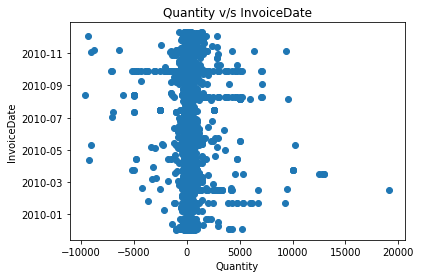

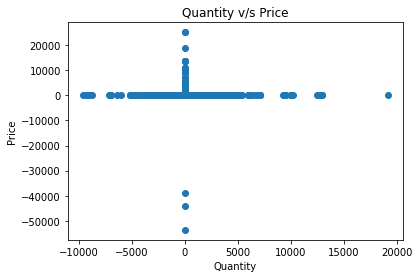

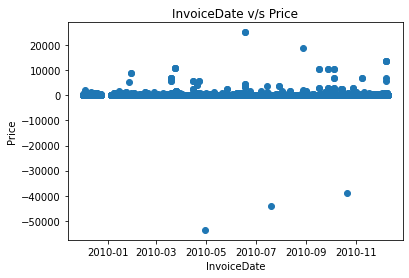

## Correlation:

## Missing Matrix:

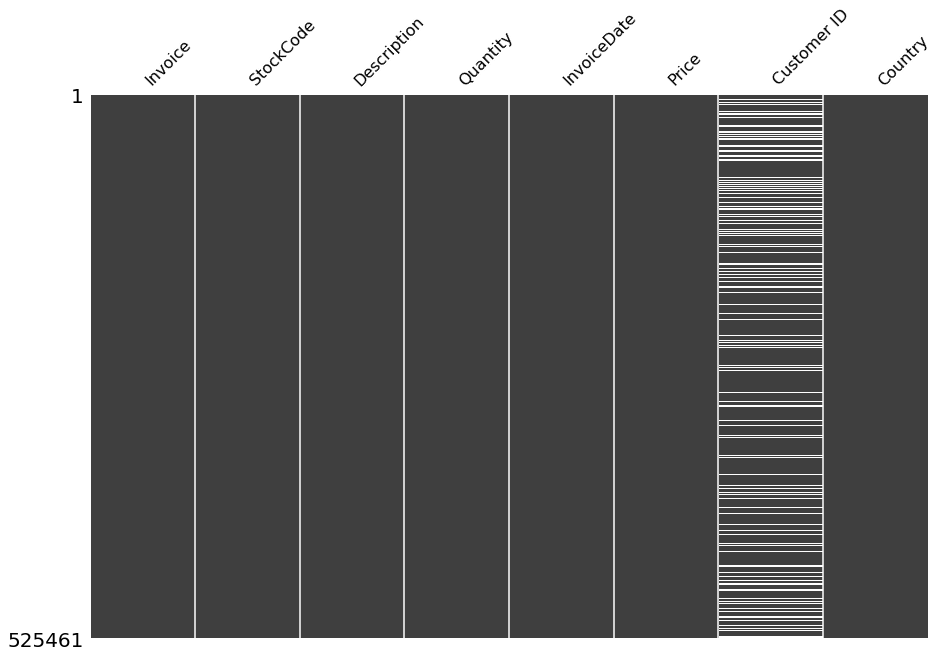

In [ ]:
profile_df(df_retail)

In [ ]:
df_retail.groupby('StockCode').Description.nunique().max() # Cada código puede estar asociado a más de una descripción

7

In [ ]:
df_retail.groupby('StockCode').Description.nunique().sort_values()

StockCode
10002    1
85015    1
85016    1
85020    1
85030    1
        ..
20685    5
22236    5
21955    5
22734    6
22423    7
Name: Description, Length: 4632, dtype: int64

In [ ]:
df_retail[df_retail.StockCode == 22423].Description.unique() # Al parecer las descripciones no son únicas

array(['REGENCY CAKESTAND 3 TIER', 'smashed', 'damaged', 'nan',
       'broken, uneven bottom', 'wonky bottom/broken', 'faulty'],
      dtype=object)


Del análisis multivariable se observa que la distribución del precio y cantidad es similar para todas las fechas, pero se pueden apreciar clatamente los outliers en algunos puntos, por ejemplo los valores negativos. También se observa con claridad los periodos en que no hay registros. Se puede ver que los outliers de precio estan ligados a cantidades cercanas a 0, los outliers de cantidad también estan ligados a precios cercanos a 0 (la escala no apaña mucho para un mejor análisis). 

Por otro lado, se puede observar que las variables numéricas 'Quantity' y 'Price' tienen una correlación negativa y cercana a 0.

En la missing matrix se observa que los datos nans de 'CustomerID' no se explican a través de su relación con otra variable.

### 1.2.3 Limpieza de Datos [1 pto] [FALTA ANÁLISIS EXPLORATORIO]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
def clean_data(dataframe):

    df=dataframe.copy()
    # Asignar nans en la descripción a valores 'nan'
    df['Description'] = df['Description'].replace('nan', pd.NA)
    # Filtrar devoluciones y venta con cantidad 0
    df=df[df['Quantity']>=1]
    # Filtrar precios no positivos
    df=df[df['Price']>0]
    # Quitar filas con nans
    df=df.dropna()
    # Quitar el 1% de cada extremo en precios 
    df = df[ df.Price.between(df.Price.quantile(.01),df.Price.quantile(.99))]
    # Quitar el 1% de cada extremo en cantidades
    df = df[df.Quantity.between(df.Quantity.quantile(.01),df.Quantity.quantile(.99))]

    return df

df_clean = clean_data(df_retail)

In [ ]:
profile_serie(df_clean['Price']) 

## Price Profile

Type                            float64
Number of observations         397018.0
Mean                           2.873543
Std                            2.591438
Min                                0.29
25%                                1.25
50%                                1.95
75%                                3.75
Max                               14.95
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           3.622957
Skew                           1.864281
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   396971
Duplicate rows (%)              99.99 %
Total size in memory      6352288 bytes
dtype: object

In [ ]:
profile_serie(df_clean['Description']) 

## Description Profile

Type                                                  object
Number of observations                                397018
Unique                                                  4297
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3097
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        396808
Duplicate rows (%)                                   99.95 %
Total size in memory                           6352288 bytes
dtype: object

In [ ]:
profile_serie(df_clean['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         397018.0
Mean                           9.346433
Std                           13.971503
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                               120.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          21.155514
Skew                           4.033434
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   397007
Duplicate rows (%)              100.0 %
Total size in memory      6352288 bytes
dtype: object

### 1.2.4 Obtención de TOPs [0.75 ptos] [FALTA COMENTAR]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
def top_k_gains_sells(dataframe, k = 30):
  """
  Genera 2 gráficos de barra con los top k productos que generan más ingresos y los top k productos más vendidos.
  """

  df = dataframe.copy()
  # Ingreso es precio * cantidad
  df['Ingresos'] = df['Quantity']*df['Price']

  # Agrupar por código de producto y sumar cantidades
  df = df[['Description', 'Quantity', 'Ingresos']].groupby(['Description']).sum()

  # Ordenar dataframe según ingresos
  df = df.sort_values('Ingresos',ascending=False)

  # Plotear top k
  fig = px.bar(df.head(k), y='Ingresos' ,title=f'Top {k} productos que generan más ingresos')
  fig.show()

  # Ordenar dataframe según cantidad
  df  =df.sort_values('Quantity',ascending=False)

  # Plotear top k
  fig = px.bar(df.head(k), y='Quantity' ,title=f'Top {k} productos más vendidos')

  fig.show()


In [ ]:
top_k_gains_sells(df_retail)

### 1.2.5 Visualización del registro temporal [0,75 ptos] [FALTA COMENTAR]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe):
  df=dataframe.copy()
  # Ingreso es precio * cantidad
  df['Ingresos'] = df['Quantity']*df['Price']

  # Agrupar por día y sumar ingresos
  df = df[['InvoiceDate', 'Ingresos']].groupby([df['InvoiceDate'].dt.date]).sum()

  # Plotear
  fig=px.line(df, y = 'Ingresos',title='Registro temporal de ventas')
  fig.show()

In [ ]:
plot_ventas(df_retail)

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>